In [1]:
import pandas as pd
import numpy as np
import seaborn as so
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.mixture import GaussianMixture

In [2]:
CountriesDataFrame = pd.read_csv('Country-data.csv')
CountriesDataFrame

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
DataDictionary = pd.read_csv('data-dictionary.csv')
DataDictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
CountriesDataFrame.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

C:\Users\andre\AppData\Local\Temp\ipykernel_23132\3936812378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  so.heatmap(CountriesDataFrame.corr(), center=0, annot=True, fmt='.2f', square=True)


<AxesSubplot: >

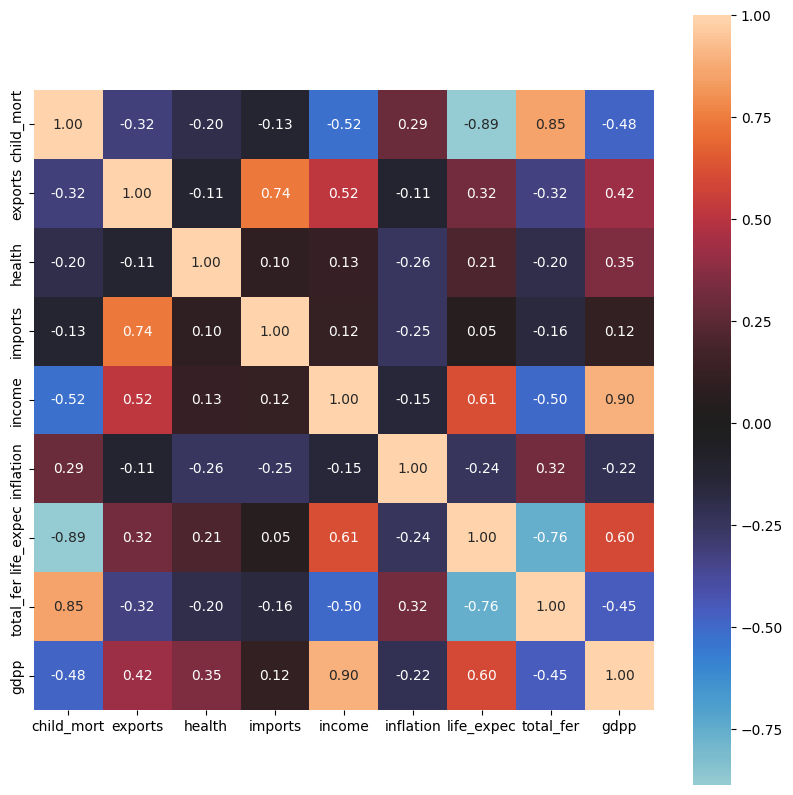

In [5]:
plt.figure(figsize=(10,10))
so.heatmap(CountriesDataFrame.corr(), center=0, annot=True, fmt='.2f', square=True)

In [6]:
CountriesDataFrame.cov()

C:\Users\andre\AppData\Local\Temp\ipykernel_23132\1936399547.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CountriesDataFrame.cov()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


In [7]:
CountriesDataFrame.var()

C:\Users\andre\AppData\Local\Temp\ipykernel_23132\2033503813.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  CountriesDataFrame.var()


child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64

In [8]:
CountriesDataFrame.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
CountriesDataFrame[CountriesDataFrame['gdpp'] <= 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [10]:
CountriesDataFrame[CountriesDataFrame['income'] <= 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [11]:
gdpptop15largest = CountriesDataFrame.nlargest(15, 'gdpp')
gdpptop15largest.sort_values(by='gdpp', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [12]:
gdpptop15smallest = CountriesDataFrame.nsmallest(15, 'gdpp')
gdpptop15smallest.sort_values(by='gdpp', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563
56,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413


In [13]:
incomeTop15Largest = CountriesDataFrame.nlargest(15, 'income')
incomeTop15Largest.sort_values(by='income', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700


In [14]:
incomeTop15smallest = CountriesDataFrame.nsmallest(15, 'income')
incomeTop15smallest.sort_values(by='income', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482
36,Comoros,88.2,16.50,4.51,51.7,1410,3.87,65.9,4.75,769
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419


In [15]:
childmortTop15largest = CountriesDataFrame.nlargest(15, 'child_mort')
childmortTop15largest.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.000,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334


In [16]:
childmortTop15smallest = CountriesDataFrame.nsmallest(15, 'child_mort')
childmortTop15smallest.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


<AxesSubplot: xlabel='income', ylabel='gdpp'>

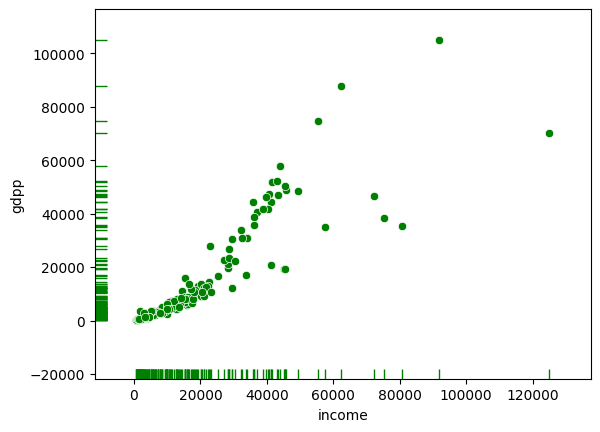

In [17]:
so.scatterplot(CountriesDataFrame, x='income', y='gdpp', color='green')
so.rugplot(CountriesDataFrame, x='income', y='gdpp', color='green')

<AxesSubplot: xlabel='imports', ylabel='gdpp'>

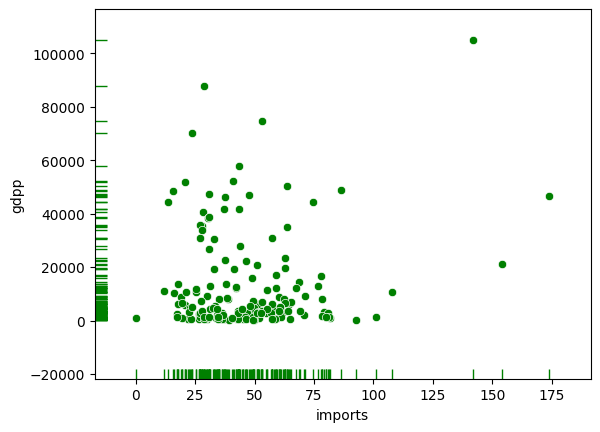

In [18]:
so.scatterplot(CountriesDataFrame, x='imports', y='gdpp', color='green')
so.rugplot(CountriesDataFrame, x='imports', y='gdpp', color='green')

<AxesSubplot: xlabel='exports', ylabel='gdpp'>

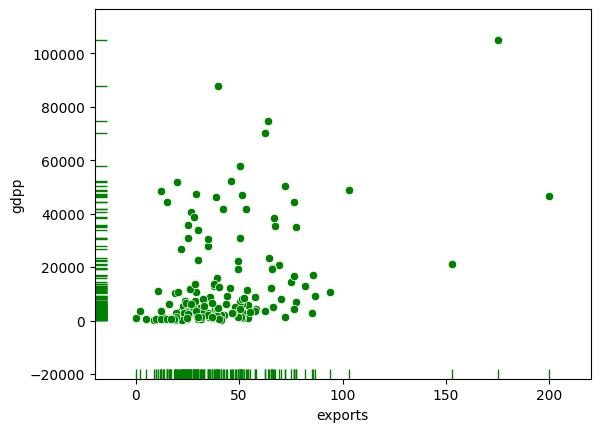

In [19]:
so.scatterplot(CountriesDataFrame, x='exports', y='gdpp', color='green')
so.rugplot(CountriesDataFrame, x='exports', y='gdpp', color='green')

<AxesSubplot: xlabel='exports', ylabel='health'>

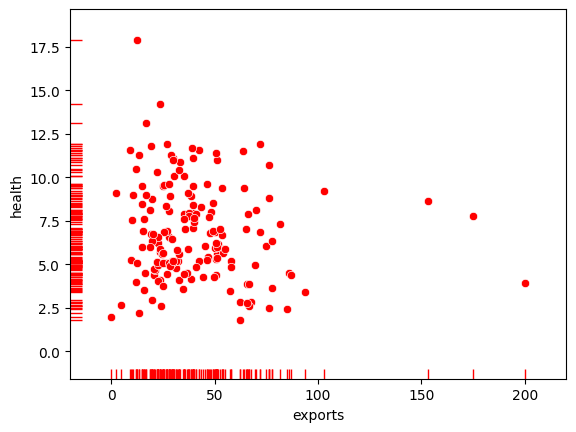

In [20]:
so.scatterplot(CountriesDataFrame, x='exports', y='health', color='red')
so.rugplot(CountriesDataFrame, x='exports', y='health', color='red')

<AxesSubplot: xlabel='imports', ylabel='health'>

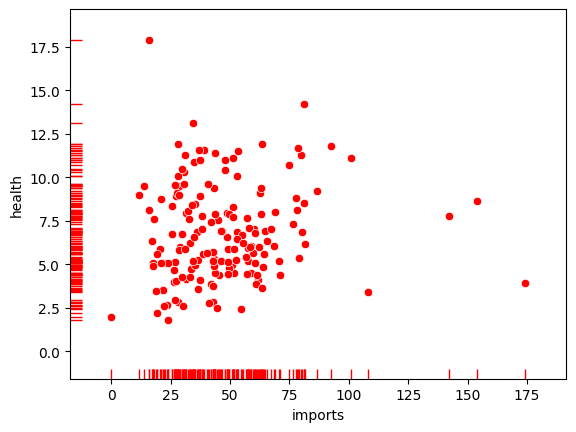

In [21]:
so.scatterplot(CountriesDataFrame, x='imports', y='health', color='red')
so.rugplot(CountriesDataFrame, x='imports', y='health', color='red')

<AxesSubplot: xlabel='gdpp', ylabel='health'>

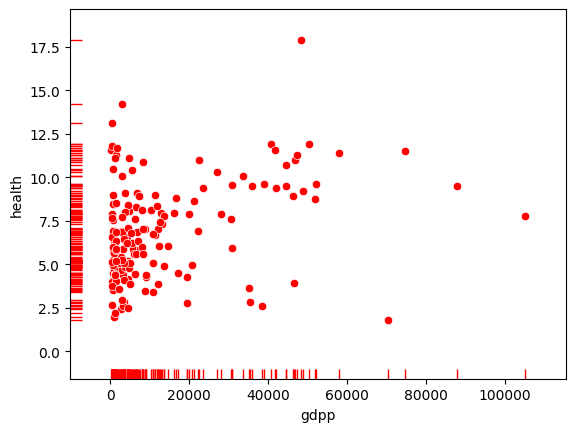

In [22]:
so.scatterplot(CountriesDataFrame, x='gdpp', y='health', color='red')
so.rugplot(CountriesDataFrame, x='gdpp', y='health', color='red')

<AxesSubplot: xlabel='income', ylabel='health'>

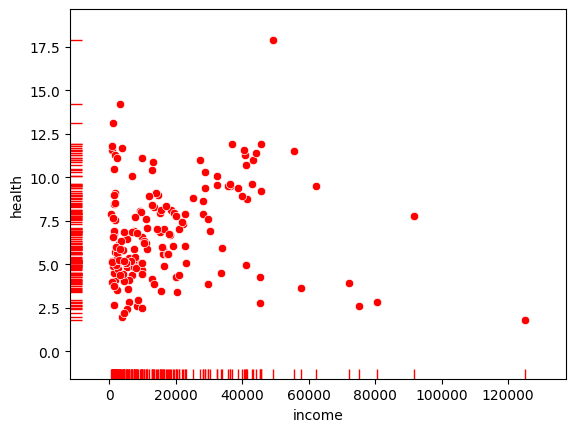

In [23]:
so.scatterplot(CountriesDataFrame, x='income', y='health', color='red')
so.rugplot(CountriesDataFrame, x='income', y='health', color='red')

<AxesSubplot: xlabel='gdpp', ylabel='life_expec'>

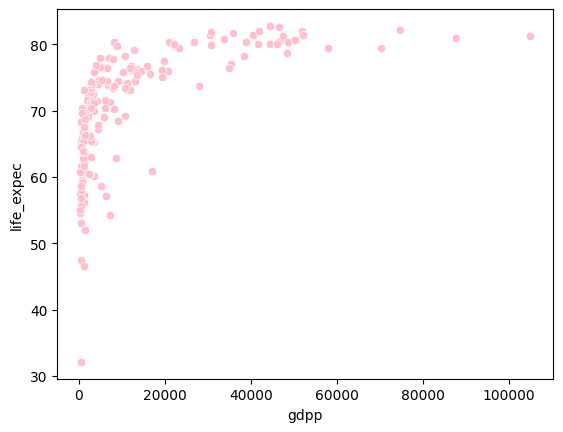

In [24]:
so.scatterplot(data=CountriesDataFrame, x="gdpp", y="life_expec", color="pink")

<AxesSubplot: xlabel='income', ylabel='child_mort'>

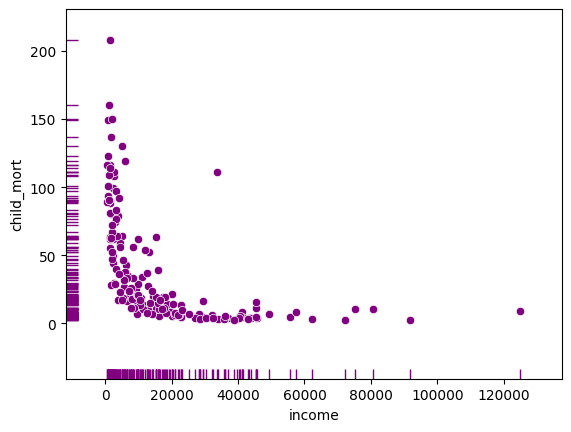

In [25]:
so.scatterplot(CountriesDataFrame, x='income', y='child_mort', color='purple')
so.rugplot(CountriesDataFrame, x='income', y='child_mort', color='purple')

<AxesSubplot: xlabel='gdpp', ylabel='Count'>

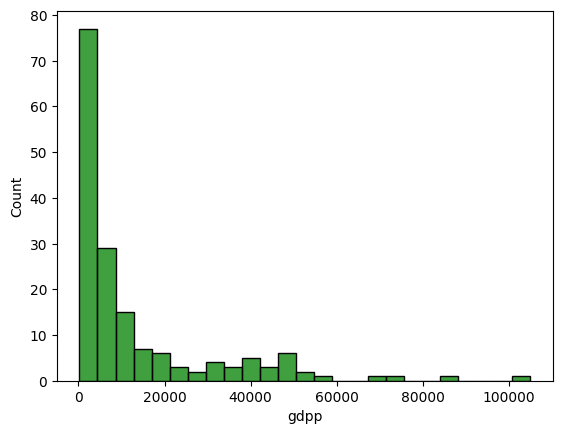

In [26]:
so.histplot(data=CountriesDataFrame, x="gdpp", bins = 25, color='green')

<AxesSubplot: xlabel='child_mort', ylabel='Count'>

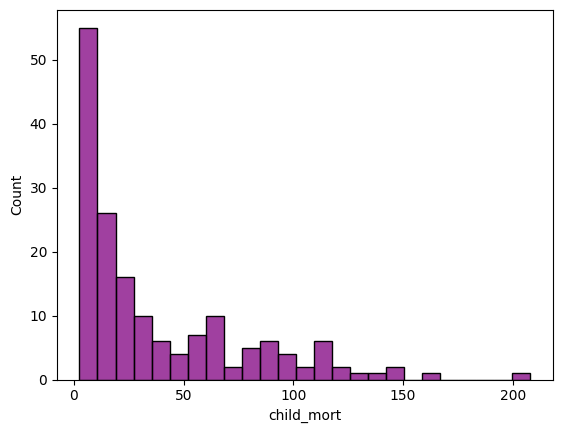

In [27]:
so.histplot(data=CountriesDataFrame, x="child_mort", bins = 25, color='purple')

<AxesSubplot: xlabel='income', ylabel='Count'>

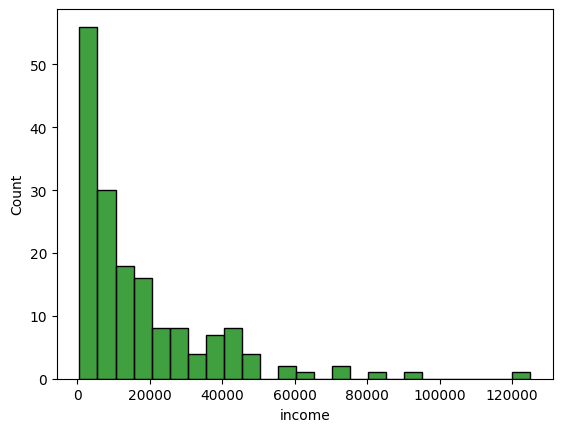

In [28]:
so.histplot(data=CountriesDataFrame, x="income", bins = 25, color='green')

<AxesSubplot: xlabel='health', ylabel='Count'>

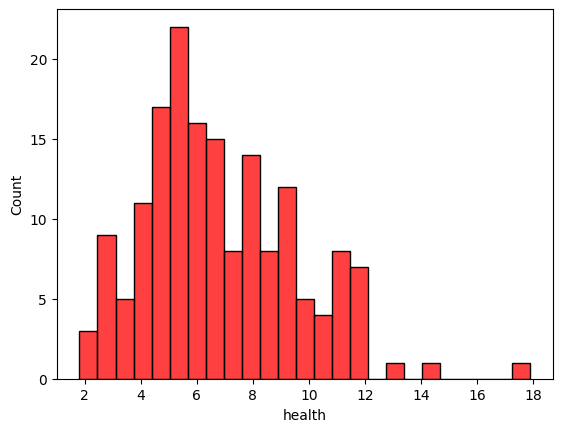

In [29]:
so.histplot(data=CountriesDataFrame, x="health", bins = 25, color='red')

<AxesSubplot: xlabel='life_expec', ylabel='Count'>

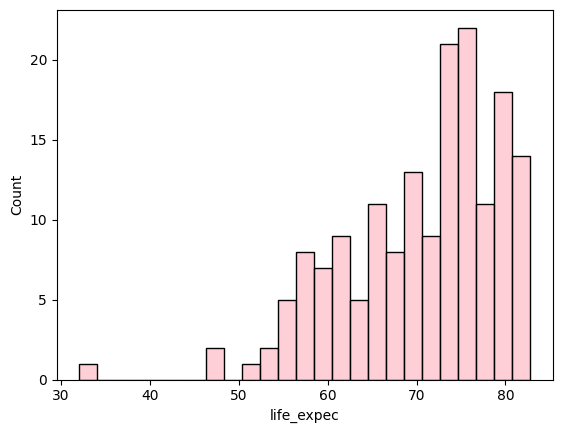

In [30]:
so.histplot(data=CountriesDataFrame, x="life_expec", bins = 25, color='pink')

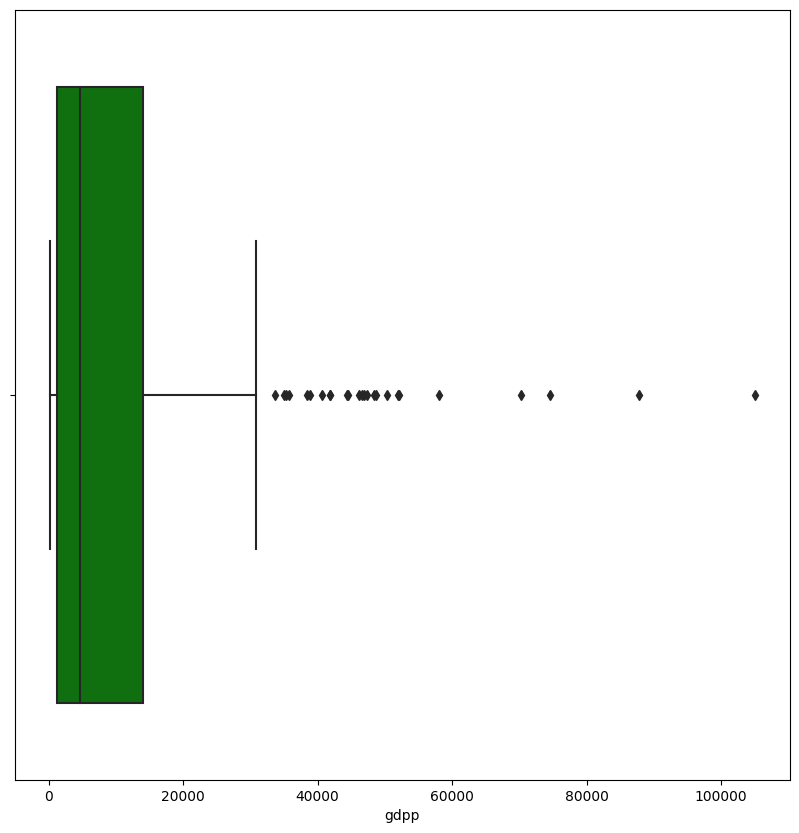

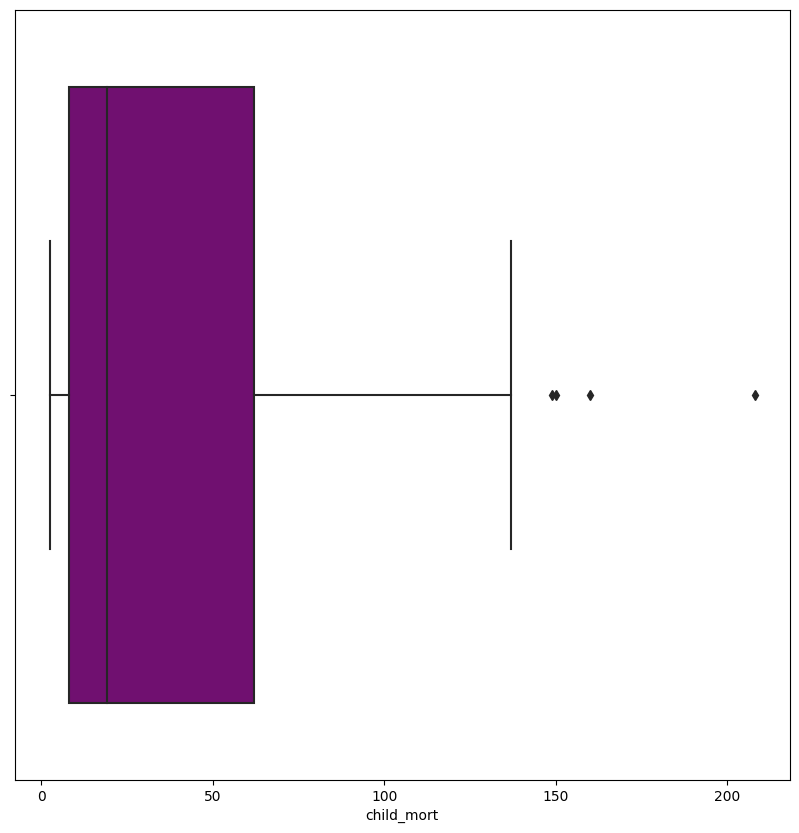

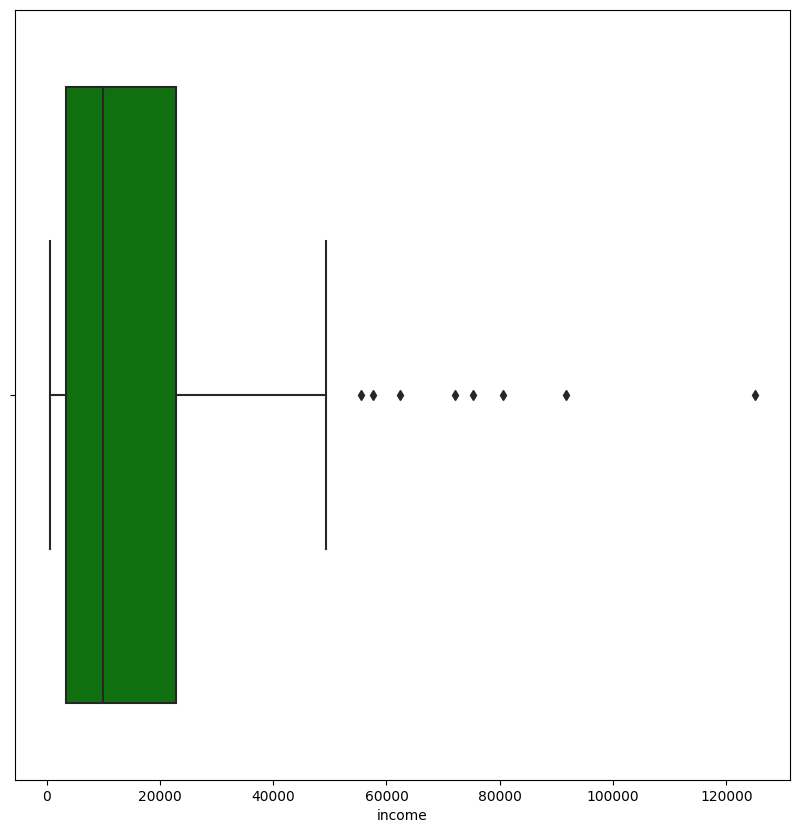

In [31]:
plt.figure(figsize=(10,10))
so.boxplot(x=CountriesDataFrame['gdpp'], color='green')
plt.show()
plt.figure(figsize=(10,10))
so.boxplot(x=CountriesDataFrame['child_mort'], color='purple')
plt.show()
plt.figure(figsize=(10,10))
so.boxplot(x=CountriesDataFrame['income'], color='green')
plt.show()

In [32]:
UpdatedData = CountriesDataFrame[CountriesDataFrame['gdpp'] < 30000]
UpdatedData = CountriesDataFrame[CountriesDataFrame['child_mort'] < 120]
UpdatedData = CountriesDataFrame[CountriesDataFrame['income'] < 50000]
UpdatedData.sort_values(by='gdpp', ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
...,...,...,...,...,...,...,...,...,...,...
73,Ireland,4.2,103.00,9.19,86.5,45700,-3.220,80.4,2.05,48700
110,Netherlands,4.5,72.00,11.90,63.6,45500,0.848,80.7,1.79,50300
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
144,Sweden,3.0,46.20,9.63,40.7,42900,0.991,81.5,1.98,52100


C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

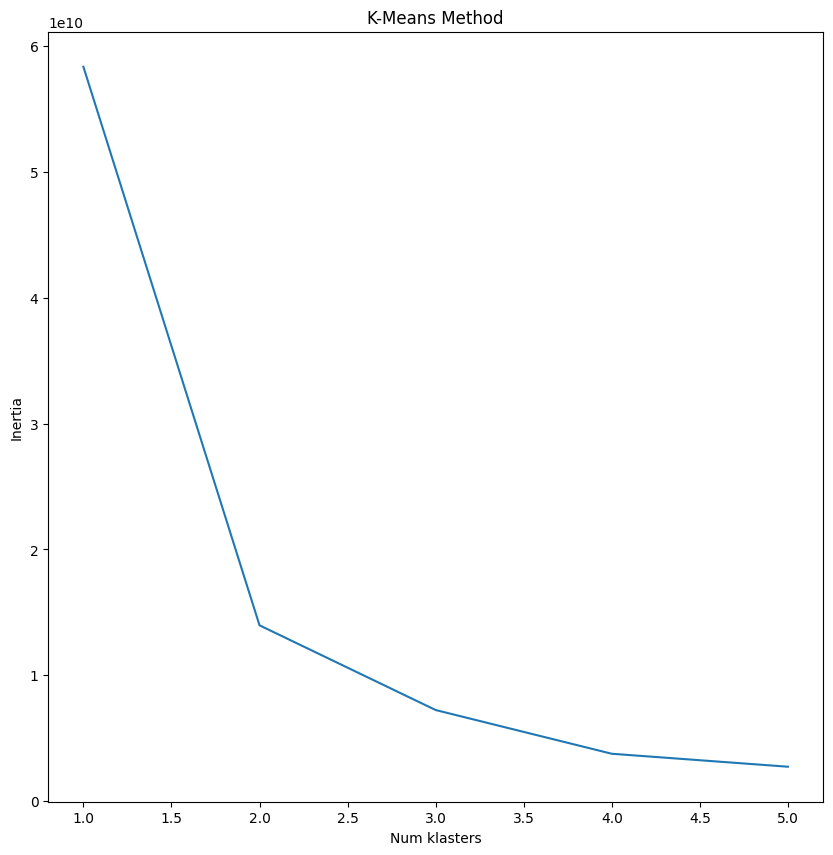

In [33]:
klaster = list(zip(UpdatedData["gdpp"], UpdatedData["income"]))
inrt = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klaster)
    inrt.append(kmeans.inertia_)
    
plt.figure(figsize=(10,10))
plt.plot(range(1,6), inrt)
plt.title('K-Means Method')
plt.xlabel('Num klasters')
plt.ylabel('Inertia')
plt.show()

C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'income')

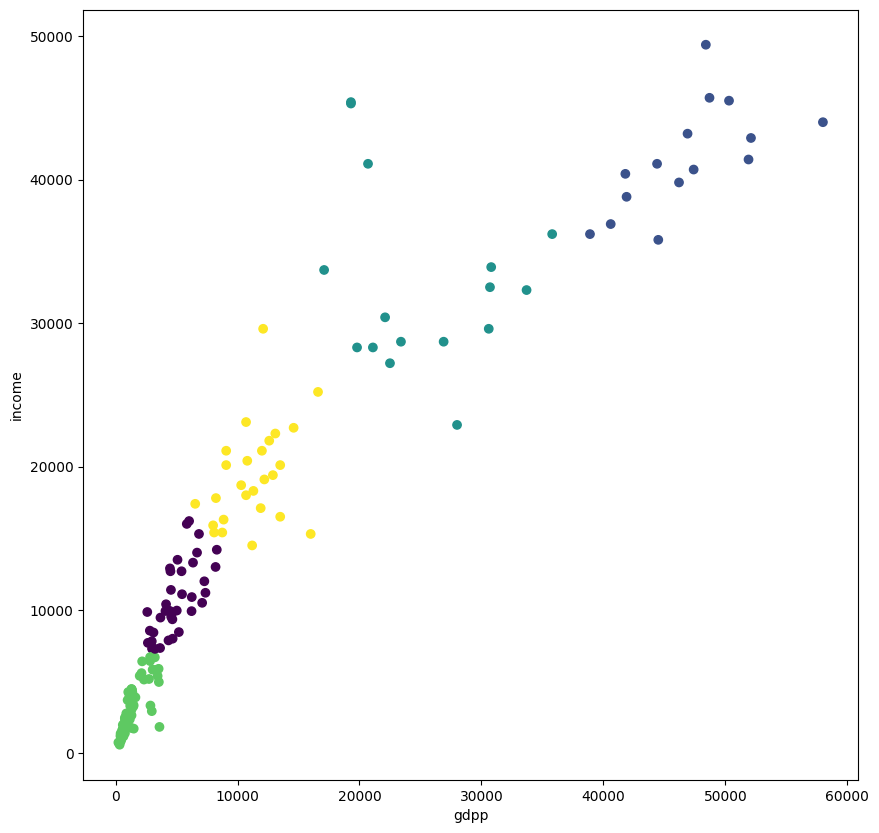

In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(klaster)

fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(UpdatedData["gdpp"], UpdatedData["income"], c=kmeans.labels_)
ax.set_xlabel('gdpp')
ax.set_ylabel('income')

Text(24.0, 0.5, 'child_mort')

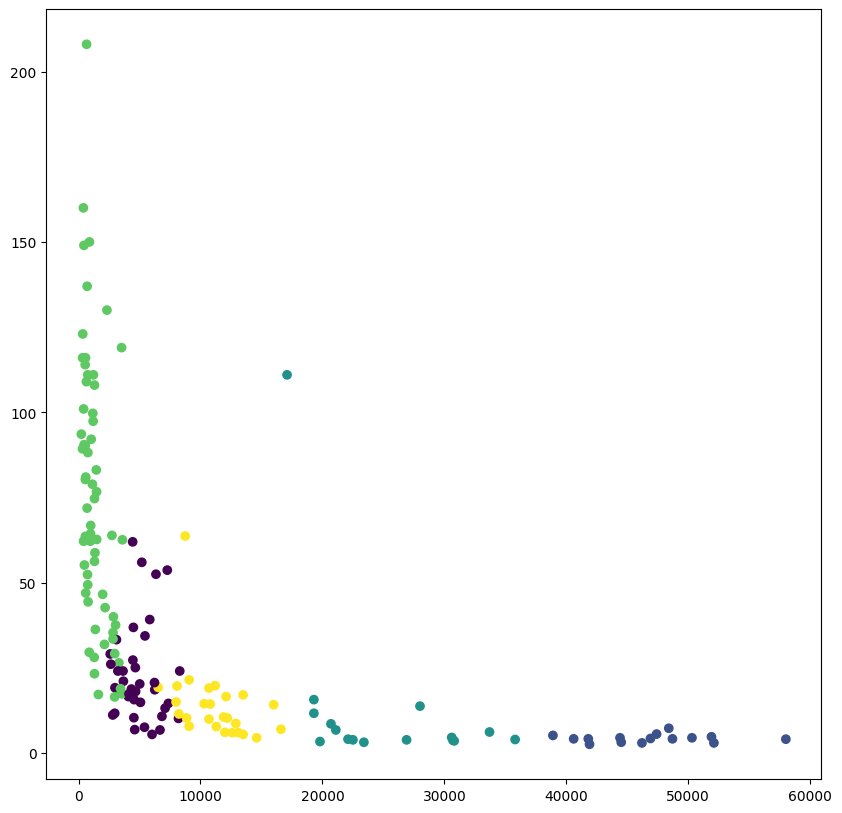

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(UpdatedData["gdpp"], UpdatedData["child_mort"], c=kmeans.labels_)
ax.set_xlabel('gdpp')
ax.set_ylabel('child_mort')

Text(24.0, 0.5, 'child_mort')

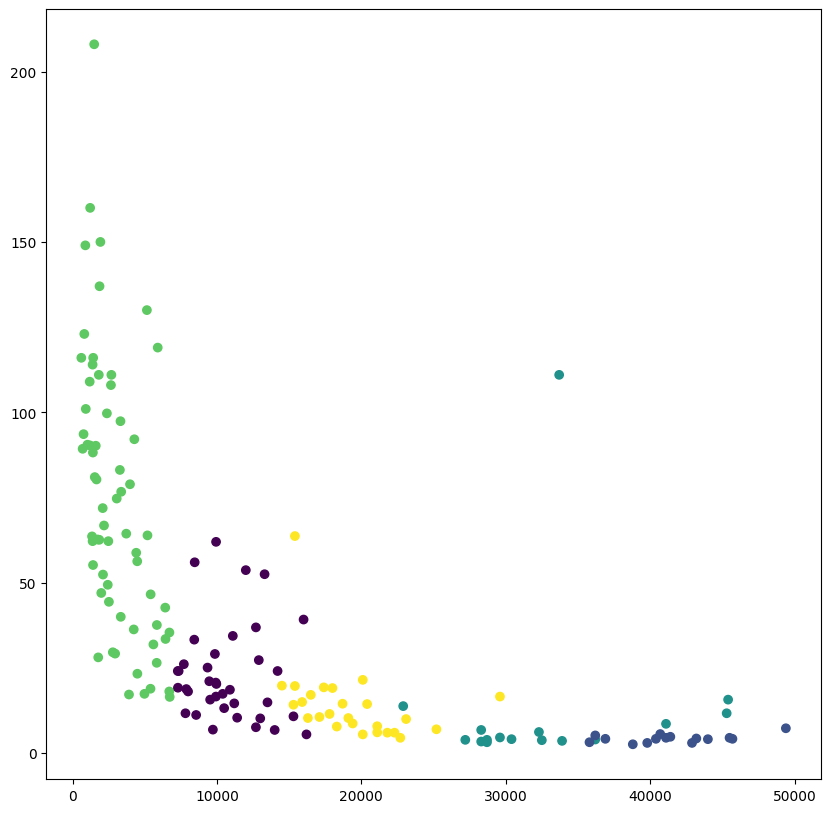

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(UpdatedData["income"], UpdatedData["child_mort"], c=kmeans.labels_)
ax.set_xlabel('income')
ax.set_ylabel('child_mort')

In [37]:
UpdatedData.nsmallest(15, ['income', 'gdpp']).sort_values(by='gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


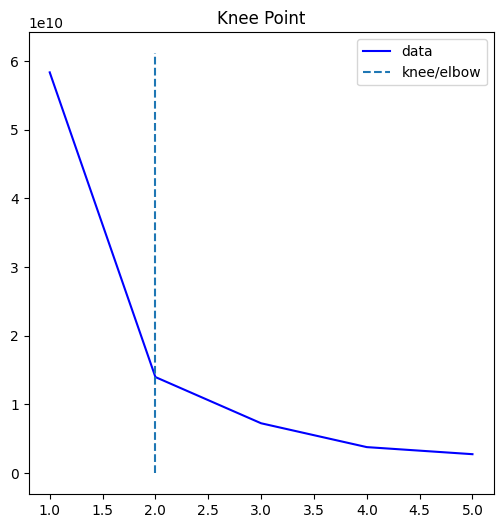

In [38]:
knee = KneeLocator(range(1, 6), inrt, curve="convex", direction="decreasing")
knee.plot_knee()

C:\Users\andre\miniconda3\envs\IADLab4\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 0, 'income')

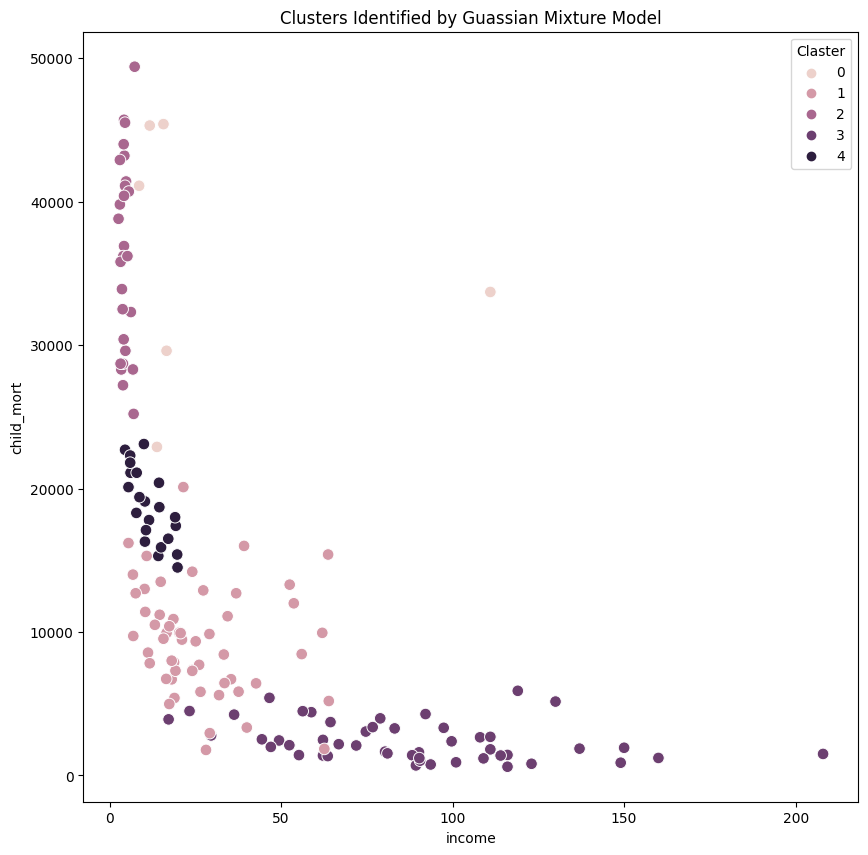

In [39]:
addClasterColumn = UpdatedData[['child_mort', 'income', 'gdpp']].copy()
n_clusters = 5
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(addClasterColumn)
cluster_labels = gmm_model.predict(addClasterColumn)
addClasterColumn = pd.DataFrame(addClasterColumn)
addClasterColumn['Claster'] = cluster_labels

plt.figure(figsize=(10,10))
so.scatterplot(x='child_mort', y='income', data=addClasterColumn, hue='Claster', s=70) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')

Text(0.5, 0, 'child_mort')

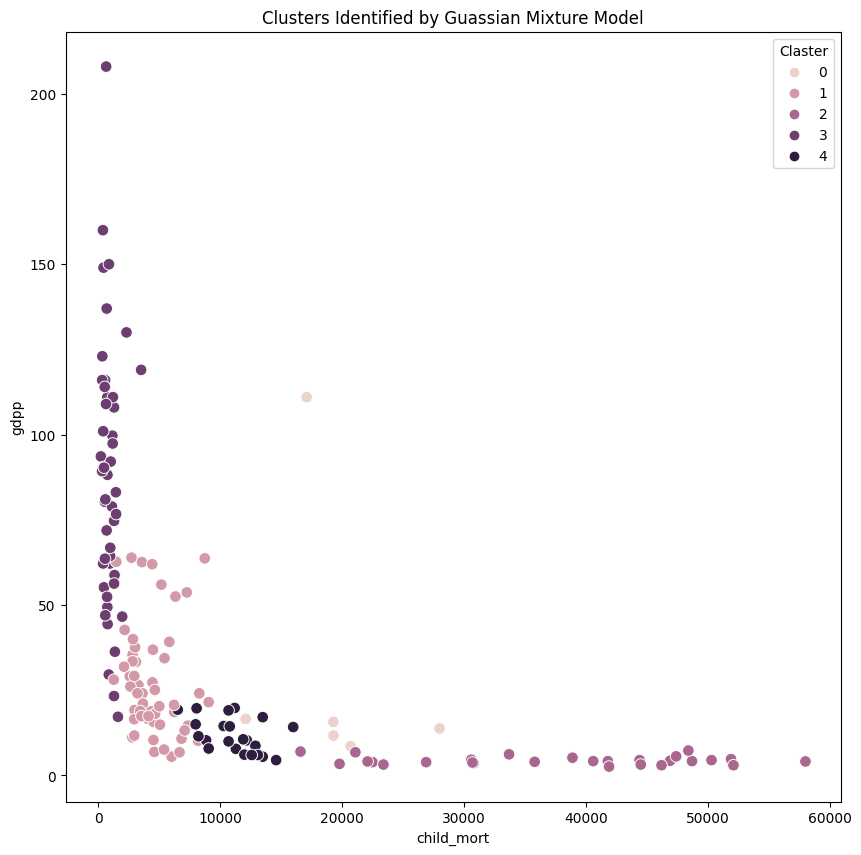

In [41]:
plt.figure(figsize=(10,10))
so.scatterplot(x='gdpp', y='child_mort', data=addClasterColumn, hue='Claster', s=70) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('gdpp')
plt.xlabel('child_mort')

Text(0.5, 0, 'income')

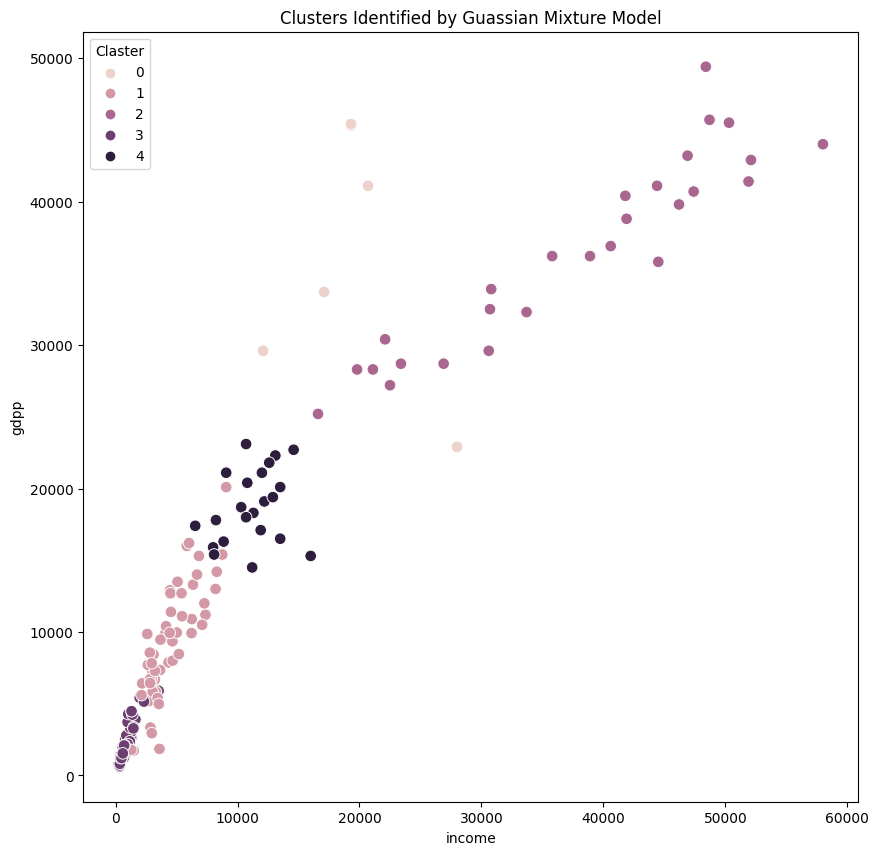

In [42]:
addClasterColumn

,child_mort,income,gdpp,Claster
0,90.2,1610,553,3
1,16.6,9930,4090,1
2,27.3,12900,4460,1
3,119.0,5900,3530,3
4,10.3,19100,12200,4
...,...,...,...,...
162,29.2,2950,2970,1
163,17.1,16500,13500,4
164,23.3,4490,1310,3
165,56.3,4480,1310,3


In [43]:
Countries = CountriesDataFrame[["country"]]
countriesClasters = pd.merge(Countries, addClasterColumn, left_index=True,right_index=True)
countriesClasters.nsmallest(15, ['income', 'gdpp'])

,country,child_mort,income,gdpp,Claster
37,"Congo, Dem. Rep.",116.0,609,334,3
88,Liberia,89.3,700,327,3
26,Burundi,93.6,764,231,3
112,Niger,123.0,814,348,3
31,Central African Republic,149.0,888,446,3
106,Mozambique,101.0,918,419,3
94,Malawi,90.5,1030,459,3
63,Guinea,109.0,1190,648,3
150,Togo,90.3,1210,488,3
132,Sierra Leone,160.0,1220,399,3


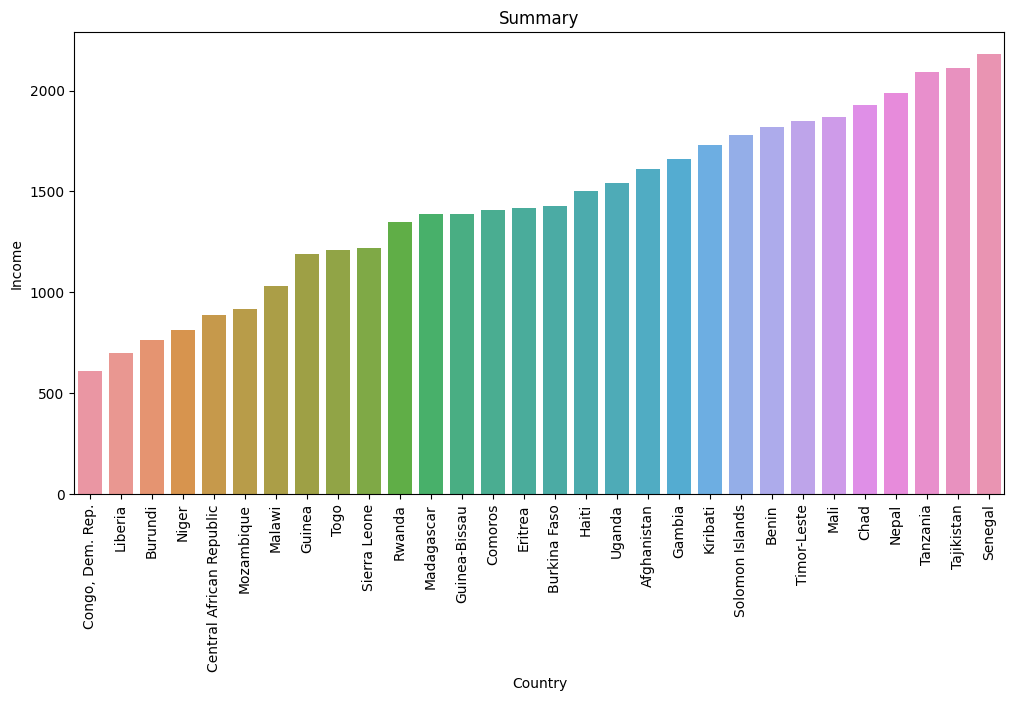

In [44]:
summaryData = countriesClasters.nsmallest(30, ['income', 'gdpp'])
plt.figure(figsize = (12,6))
plt.xticks(rotation=90)
so.barplot(data=summaryData, x='country',y='income')
plt.xlabel('Country')
plt.ylabel('Income')
plt.title('Summary')
plt.show()